<h6>PE02_A02<h6>
    
# SBBFU Project 

### 1. About the project 
 
    
##### 
    
> We aim to develop Python-based data analysis software
> The goal is to develop software that can analyze wafer scale data in detail.
>
> At first,
>
> The main task is to receive data from the customer and then receive the request.
> 
> Main request 
> + Lot
> + Wafer
> + Die row & colum
> 
> We can analyze the selected data by specifying specific elements    
> In order to develop such analysis software, 
> a black box(software) that implments this function is created to solve the customer's request.
>
> In the software,
> We process the raw data and print it out. 
> We show the processed data as a 2*3 figure and save the file. 
> 
> In addition, it creates an Excel csv file that can analyze varous 
> xml files as a result file and makes a dataframe that can be compared simply.
>
> Finally, the final report The final goal is to make documentation about the tasks 
> we did using a jupyter notebook and report it to the customer.
>
> Please put the data in the 'Data' folder
> specify the file path
> Run the Run.py 

### 2. Run file description 
 
##### 
 >Create a folder corresponding to the output that can be delivered to customers by copying the data in the **'Data'** folder to **'Result'**
 >Data is processed by selecting only files with the filename "LMZ"
 >Load the module that processes and fits raw data and the module that makes the data parsed from xml file into a csv file, respectively.


### 3. Project information 

>* Getting Stared
>   + Entered the Terminal, write down 'pip install -r requirements.txt' and download it. \
>``(base) C:\Download\PE02_A02_SBBFU-1>pip install -r requirements.txt``
>
>
>* How to Run
>   + Please enter the file_location and parameter of save_figure, show_figure, save_csv. \
``file_path = '.\dat\P184640\**\*LMZ?.xml'``\
The customer can choose the option (save figure, show figure, save csv).
 
 ![image](https://user-images.githubusercontent.com/84078034/121302349-87472080-c934-11eb-8532-9d4e715bd922.png)
***

### 4. Description of the module file feature
###### 1) Fitting module 
 
  >* The graph is drawn by parsing the raw data of Wavelengthsweep, IL, Current, and Voltage in the xml file.
    
 >* The fitting of parsing a raw data and displays the data value y-axis corresponding to x-axis by the customer and the desired R-squared, etc. and stored in the graph to visualize the image.
 ![image](https://user-images.githubusercontent.com/84078034/121302547-d2613380-c934-11eb-8ef4-6b330f316406.png)

##### 2) CSV module 
 

  >- Create a dataframe so that the meausured information in the xml file can be viewed at a glance.
  
  >- Save this data frome in csv format in the 'Result' folder.
  
   >- The following photo is a csv file that analyzes the data provided by the customer.
     
  >* It contains a variety of data information, including Lot, Wafer, and Operator etc.
     
  >* Save this data frome in csv format in the 'Result' folder.
     
  >* If 'r-squared' is less than 0.95, an ‘Errorflag’ appears in the csv file.
 
 
 ![캡처](https://user-images.githubusercontent.com/80964488/117802539-903ec680-b290-11eb-969f-6fd459a8d594.PNG)

The following is the data analysis data provided by the customer.

Processing P184640_D24_(3,0)_GORILLA5_DCM_LMZO: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [01:16<00:00,  1.28it/s]


모든 파일이 완료되었습니다. 수고하셨습니다.
실행 시간 :76.9초


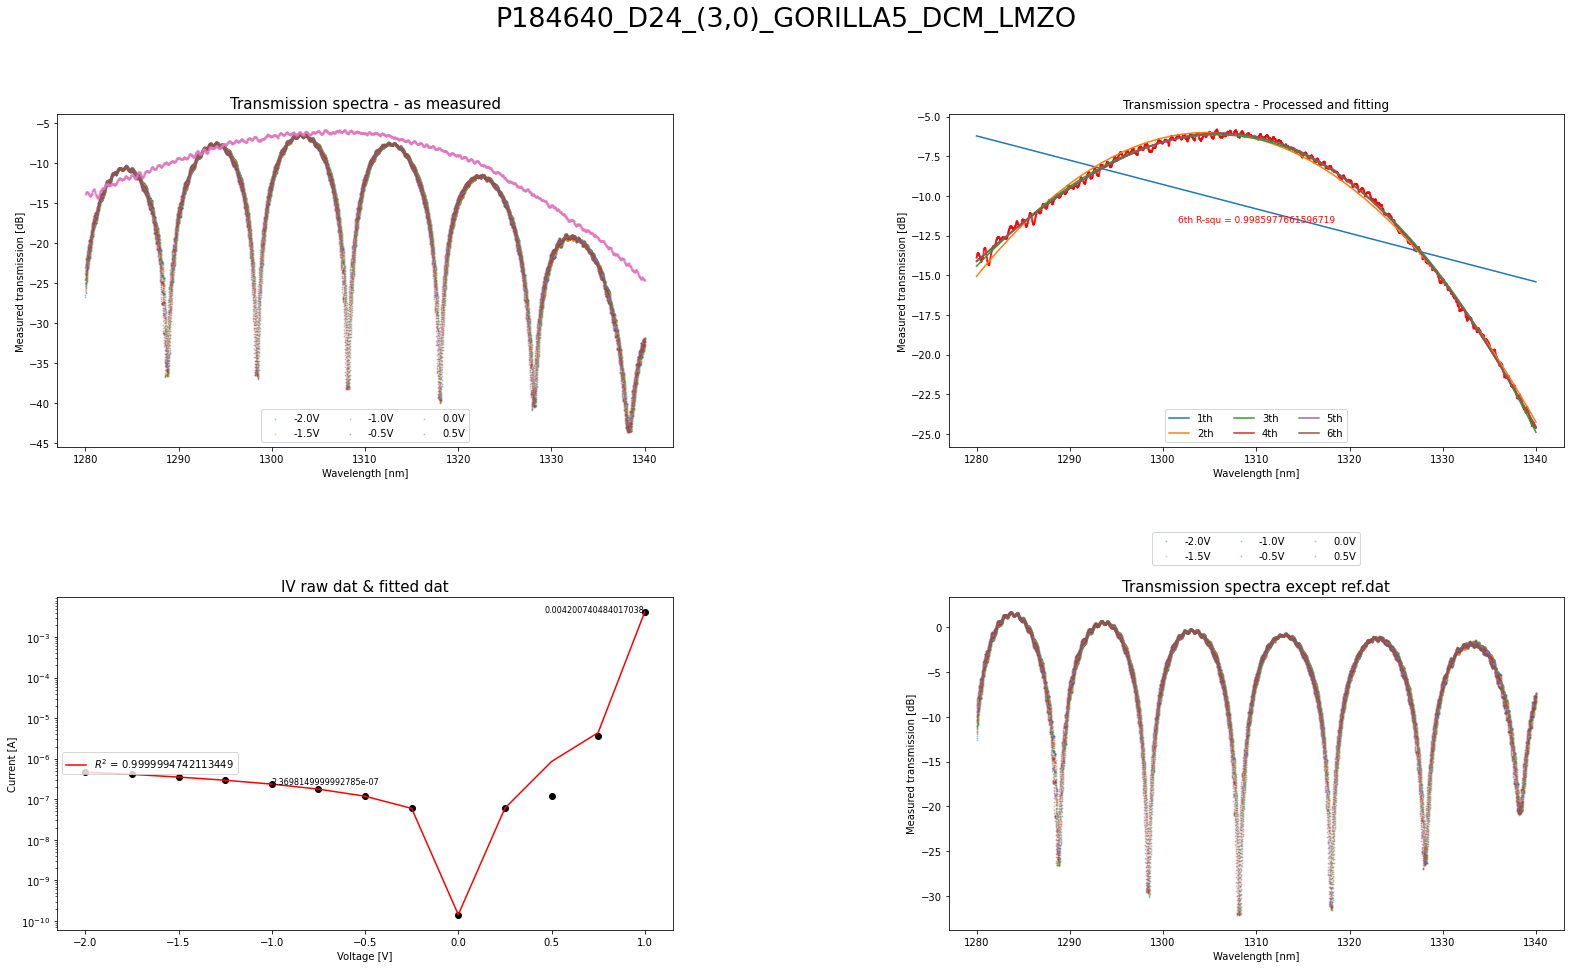

In [38]:
run -i run.py

The picture above is the execution screen. You will then be prompted to select options according to the result form you want to analyze.

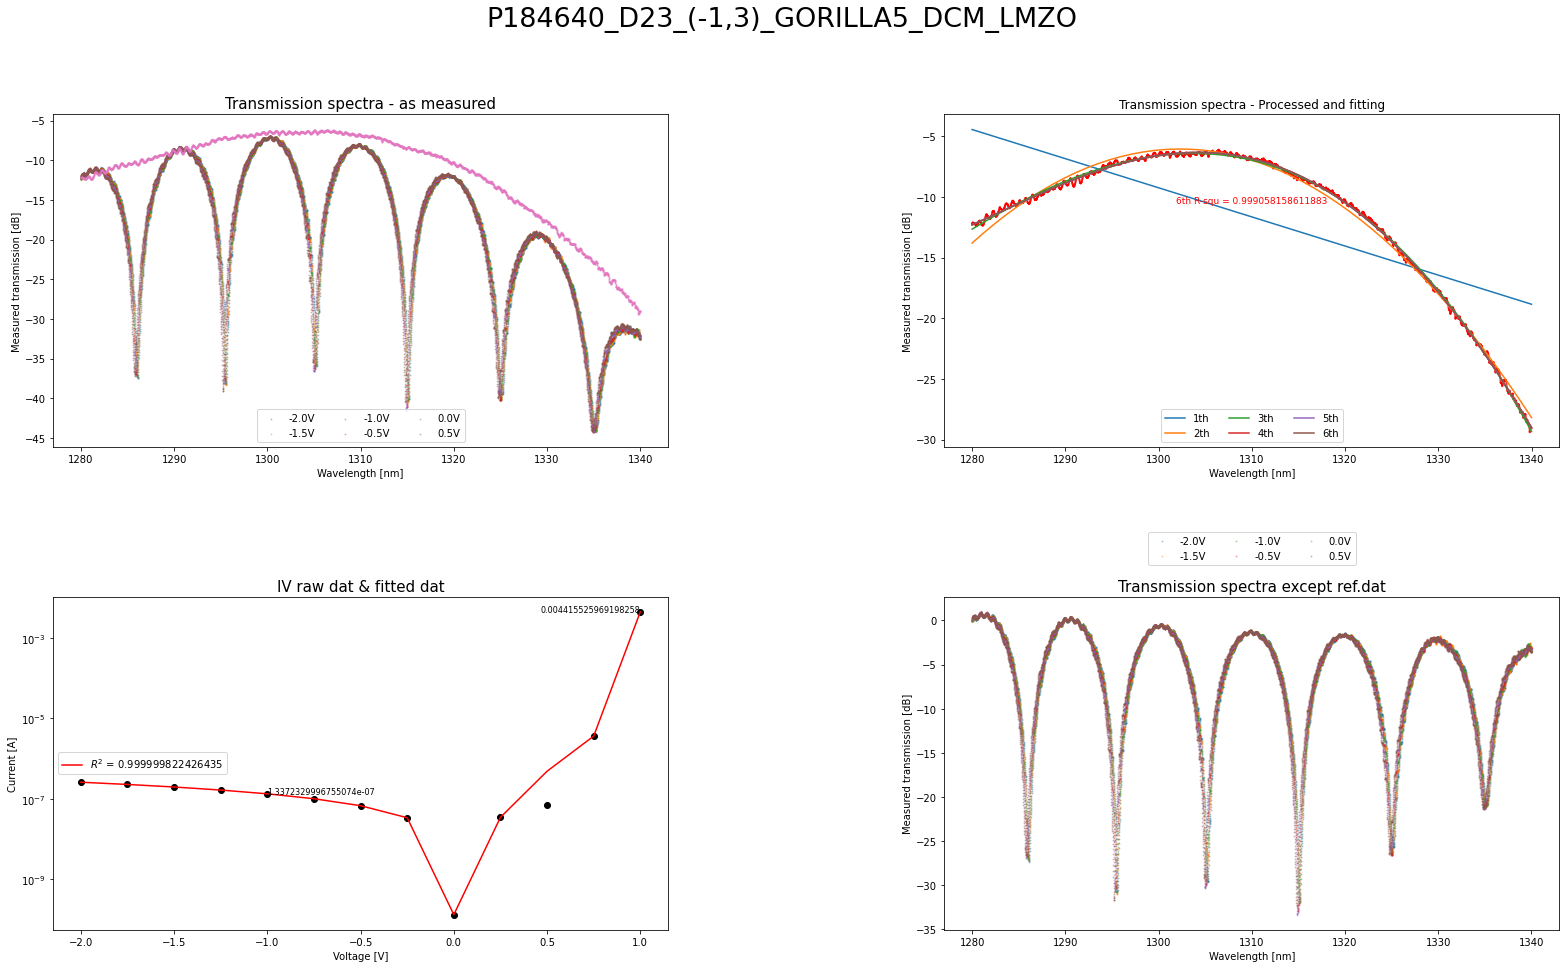

이 fitting figure는 I-V Data는 측정이 잘 되었습니다.


In [39]:
from src import process
import os
import glob
import random

file_path = '.\dat\P184640\**\*LMZ?.xml'

xml = []
for filename in glob.glob(file_path, recursive=True):
    xml.append(filename)
    
i = random.randint(0,98)

def function(i):
    if 41< i <56 :
        process.fitting(xml[i],1,1)
        print('이 fitting figure는 I-V Data 측정이 잘못되었습니다.')

    elif 69< i <84 :
        process.fitting(xml[i],1,1)
        print('이 fitting figure는 I-V Data 측정이 잘못되었습니다.')

    else:
        process.fitting(xml[i],1,1)
        print('이 fitting figure는 I-V Data는 측정이 잘 되었습니다.')


if 41< i <56 :
    a = random.randint(0,98)
    function(a)
    if 41<a<56:
        b = random.randint(0,98)
        function(b)
    elif 69< a < 84:
        b = random.randint(0,98)
        function(b)
    else:
        process.fitting(xml[a],1,1)
        print('이 fitting figure는 I-V Data는 측정이 잘 되었습니다.')

elif 69< i <84:
    a = random.randint(0,98)
    function(a)
    if 41<a<56:
        b = random.randint(0,98)
    elif 69< a < 84:
        b = random.randint(0,98)
        function(b)
    else:
        process.fitting(xml[a],1,1)
        print('이 fitting figure는 I-V Data는 측정이 잘 되었습니다.')

else:
    process.fitting(xml[i],1,1)
    print('이 fitting figure는 I-V Data는 측정이 잘 되었습니다.')


This fitting figure was measured well with I-V Data.

This is the fitting result by randomly extracting the data you gave me.
In the executable file, whether or not the selected option is saved in the "res" folder is different.

### <'Max transmission of Ref. spec.'>
>- The following graphs are represented by Wafer type.

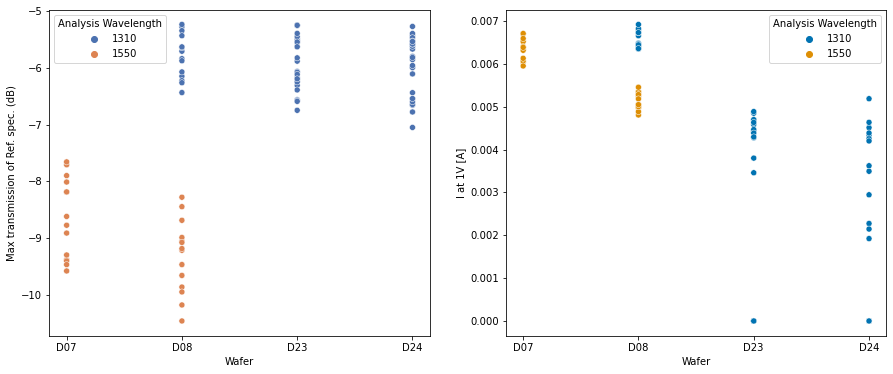

In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

df_res = pd.read_csv(r'./res/csv/process_Result.csv')

ax = plt.subplot(1,2,1)
g = plt.gcf()
g.set_size_inches(15, 6)  #그림 size 수정_JH

g = sns.scatterplot(data=df_res,  x="Wafer", y="Max transmission of Ref. spec. (dB)",hue ="Analysis Wavelength",palette ="deep", ax = ax );

ax = plt.subplot(1,2,2)
h = sns.scatterplot(data=df_res, x = "Wafer", y = "I at 1V [A]", hue = "Analysis Wavelength", palette = "colorblind", ax = ax)

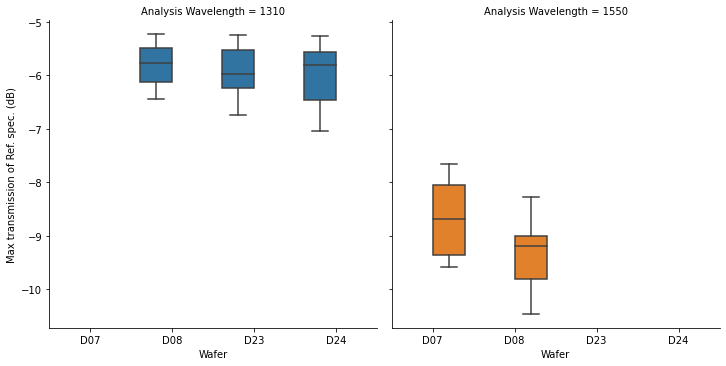

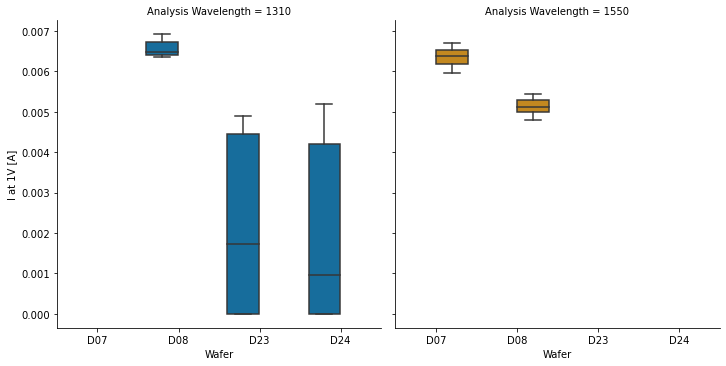

In [120]:
sns.factorplot(data = df_res, x ="Wafer", y= "Max transmission of Ref. spec. (dB)",hue ="Analysis Wavelength", col="Analysis Wavelength",aspect =1,kind="box" )
sns.factorplot(data=df_res, x = "Wafer", y = "I at 1V [A]", hue = "Analysis Wavelength", palette = "colorblind", kind = "box",col="Analysis Wavelength")

>- Orange is 1550nm wavelength and blue is 1310nm wavelength.
>- It was divided by wafer and presented 'Max transmission Ref.spec.' according to wavelength.

In [56]:
df_res

,Lot,Wafer,Mask,TestSite,Name,Date,Script ID,Script Version,Script Owner,Operator,Row,Column,ErrorFlag,Error description,Analysis Wavelength,Rsq of Ref.spectrum (Nth),Max transmission of Ref. spec. (dB),Rsq of IV,I at -1V [A],I at 1V [A]
0,P184640,D07,GORILLA5,DCM_LMZC,MZMCTE_LULAB_450_500,20190715_191703,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",-1,-1,0,No error,1550,0.998434,-7.706903,1.000000,2.603237e-08,0.006702
1,P184640,D07,GORILLA5,DCM_LMZC,MZMCTE_LULAB_450_500,20190715_192309,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",-1,-3,0,No error,1550,0.997227,-8.910147,1.000000,4.890819e-08,0.006328
2,P184640,D07,GORILLA5,DCM_LMZC,MZMCTE_LULAB_450_500,20190715_202341,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",-1,3,0,No error,1550,0.997172,-9.376518,1.000000,4.591942e-08,0.006376
3,P184640,D07,GORILLA5,DCM_LMZC,MZMCTE_LULAB_450_500,20190715_195307,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",-3,-3,0,No error,1550,0.996162,-8.187534,1.000000,5.465495e-08,0.006316
4,P184640,D07,GORILLA5,DCM_LMZC,MZMCTE_LULAB_450_500,20190715_194108,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",-3,0,0,No error,1550,0.998104,-8.772166,1.000000,4.814727e-08,0.006533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,P184640,D24,GORILLA5,DCM_LMZO,MZMOTE_LULAB_380_500,20190603_232720,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",0,2,0,No error,1310,0.998932,-5.579454,0.999999,2.787125e-07,0.003622
94,P184640,D24,GORILLA5,DCM_LMZO,MZMOTE_LULAB_380_500,20190603_231854,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",2,-1,0,No error,1310,0.998371,-5.534558,0.999999,2.901249e-07,0.004257
95,P184640,D24,GORILLA5,DCM_LMZO,MZMOTE_LULAB_380_500,20190604_000937,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",2,-3,0,No error,1310,0.998761,-5.957448,1.000000,2.511984e-07,0.004634
96,P184640,D24,GORILLA5,DCM_LMZO,MZMOTE_LULAB_380_500,20190604_002634,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",2,2,0,No error,1310,0.998004,-5.796686,0.999999,2.305046e-07,0.004387


Below is the result of the data that the customer asked us to analyze. Our analysis shows that I-V indicates that the data is incorrect as 'Errorflag'.

In [6]:
df_res[df_res['ErrorFlag'] == 1]

,Lot,Wafer,Mask,TestSite,Name,Date,Script ID,Script Version,Script Owner,Operator,Row,Column,ErrorFlag,Error description,Analysis Wavelength,Rsq of Ref.spectrum (Nth),Max transmission of Ref. spec. (dB),Rsq of IV,I at -1V [A],I at 1V [A]
42,P184640,D23,GORILLA5,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_081952,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",-1,-1,1,Rsq error,1310,0.998081,-5.525900,0.034890,1.551636e-10,1.196037e-10
43,P184640,D23,GORILLA5,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_085346,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",-1,-3,1,Rsq error,1310,0.999189,-5.481581,0.022669,1.523970e-10,1.104701e-10
44,P184640,D23,GORILLA5,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_143204,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",-1,3,1,Rsq error,1310,0.998900,-6.062085,0.033209,1.648467e-10,1.160348e-10
45,P184640,D23,GORILLA5,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_114251,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",-3,-3,1,Rsq error,1310,0.998819,-6.239155,0.032893,1.807380e-10,1.002105e-10
46,P184640,D23,GORILLA5,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_103513,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",-3,0,1,Rsq error,1310,0.999362,-5.252536,0.039627,1.409624e-10,1.212723e-10
47,P184640,D23,GORILLA5,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_150551,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",-3,2,1,Rsq error,1310,0.999218,-6.307422,0.033887,1.172141e-10,1.301543e-10
48,P184640,D23,GORILLA5,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_110901,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",-4,-1,1,Rsq error,1310,0.998629,-6.560473,0.029224,1.485885e-10,1.136081e-10
49,P184640,D23,GORILLA5,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_121641,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",0,-4,1,Rsq error,1310,0.999142,-6.075682,0.027690,1.943963e-10,9.561477e-11
50,P184640,D23,GORILLA5,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_074558,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",0,0,1,Rsq error,1310,0.997736,-5.880475,0.025639,1.495241e-10,1.135033e-10
51,P184640,D23,GORILLA5,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_100126,process LMZ,0.1,A02,"JoohanBae,Parkseoungmin,Jeonsuin",0,2,1,Rsq error,1310,0.998756,-5.243661,0.032351,1.506964e-10,1.200721e-10


It is a representation of the data on the wrong I-V graph. This data is wrong, so I request you to measure it again.

### 5. Conclusion

 >* After passing the law data provided by the customer, they use the ‘fitting module’ to fit.
 
 >* Save this fitting figure in the ‘result’ folder.
   
 >- Save the csv file to the 'result' folder based on the data provided by the customer.